In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [22]:
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.


In [23]:

df = pd.read_csv("/Users/louisdorsing/Desktop/Coding/BI/IBM_HR_BI-Project/cleaned_hr_data.csv")
print(df.Attrition)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


In [24]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


**EDA**


**Attrition by Job Role**

['Sales_Executive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
                           count  sum  attrition_rate
JobRole_Short                                        
Healthcare_Representative    131    9        6.870229
Human_Resources               52   12       23.076923
Laboratory_Technician        259   62       23.938224
Manager                      102    5        4.901961
Manufacturing_Director       145   10        6.896552
Research_Director             80    2        2.500000
Research_Scientist           292   47       16.095890
Sales_Executive              326   57       17.484663
Sales_Representative          83   33       39.759036


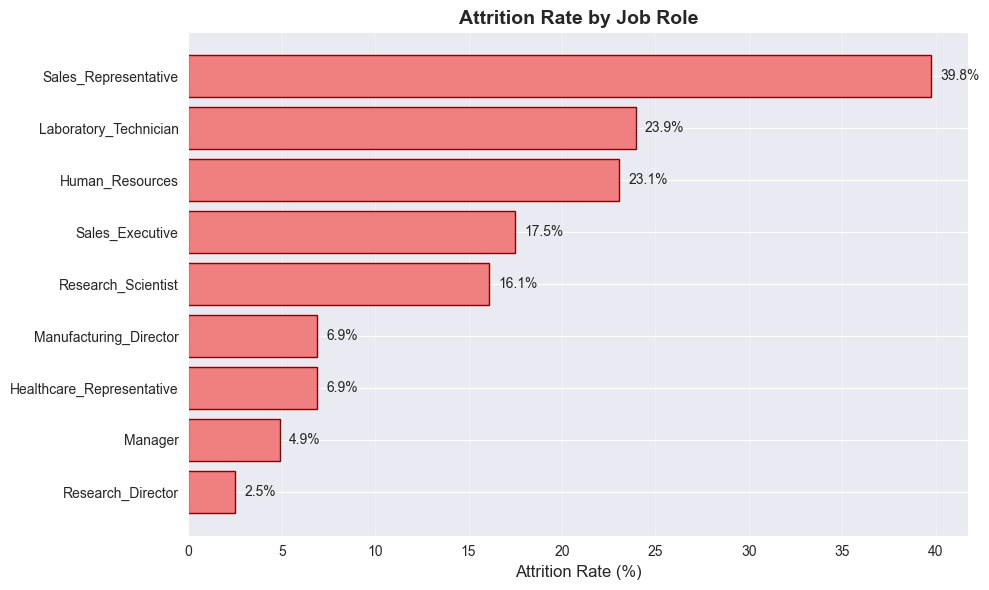

In [46]:

#Attrition by Job Role
print(df['JobRole'].unique())

attrition_by_jobRole = df.groupby('JobRole')['Attrition'].agg(['sum', 'count'])

attrition_by_jobRole['attrition_rate'] = (attrition_by_jobRole['sum'] / attrition_by_jobRole['count']) * 100

df['JobRole_Short'] = df['JobRole'].replace({
    'Healthcare Representative': 'Healthcare Rep',
    'Human Resources': 'HR',
    'Laboratory Technician': 'Lab Tech',
    'Research Director': 'Research Dir',
    'Research Scientist': 'Research Sci',
    'Sales Executive': 'Sales Exec',
    'Sales Representative': 'Sales Rep',
    'Manufacturing Director': 'Manuf Director'
})

attrition_by_jobRole = df.groupby('JobRole_Short')['Attrition'].agg(['count', 'sum'])
attrition_by_jobRole['attrition_rate'] = (attrition_by_jobRole['sum'] / attrition_by_jobRole['count']) * 100

print(attrition_by_jobRole)

import matplotlib.pyplot as plt

# sort
attrition_sorted = attrition_by_jobRole.sort_values('attrition_rate')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(attrition_sorted.index, attrition_sorted['attrition_rate'],
                color='lightcoral', edgecolor='darkred')

plt.xlabel('Attrition Rate (%)', fontsize=12)
plt.title('Attrition Rate by Job Role', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

#show numbers
for bar, rate in zip(bars, attrition_sorted['attrition_rate']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{rate:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


**Attrition by Department**

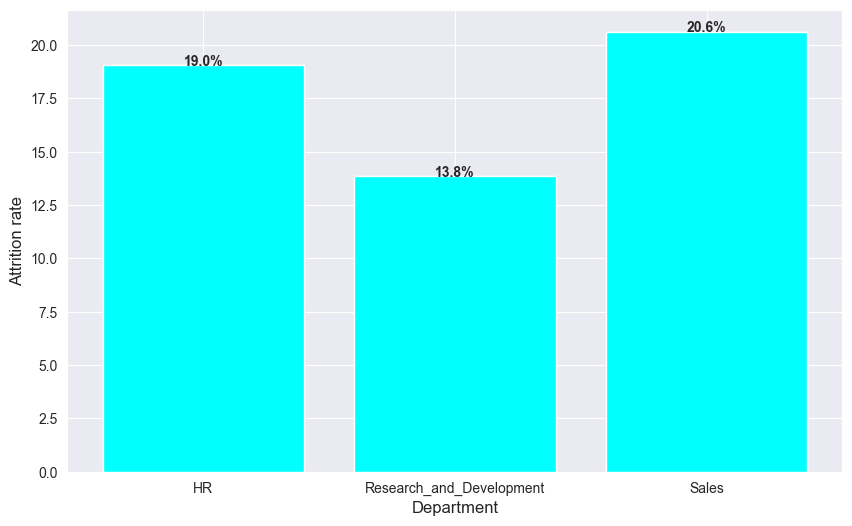

In [59]:
attrition_by_department = df.groupby('Department')['Attrition'].agg(['sum', 'count'])
attrition_by_department['attrition_rate'] = (attrition_by_department['sum'] / attrition_by_department['count']) * 100

plt.figure(figsize=(10, 6))
plt.bar(attrition_by_department.index, attrition_by_department['attrition_rate'])
bars = plt.bar(attrition_by_department.index, attrition_by_department['attrition_rate'], color='cyan')
for i, (bar, rate) in enumerate(zip(bars, attrition_by_department['attrition_rate'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate:.1f}%',
             ha='center', va='top', fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition rate', fontsize=12)

plt.show()




**Attrition rate by age**

           sum  count  attrition_rate
Age_Group                            
18-25       38     97       39.175258
26-35      112    554       20.216606
36-45       51    505       10.099010
46-55       25    245       10.204082
56-65       11     69       15.942029


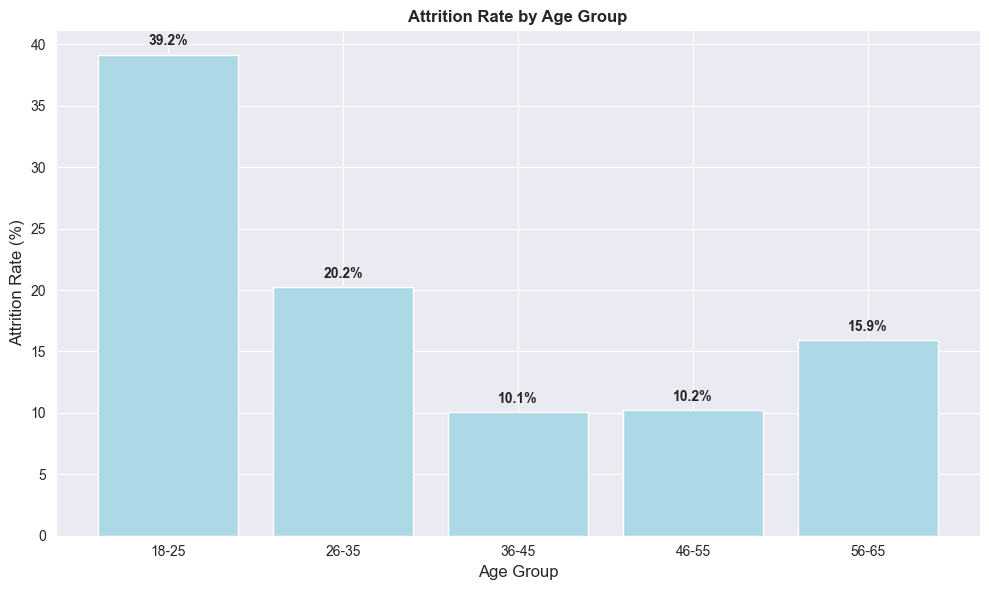

In [61]:
# defien age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# group by age groups
attrition_by_age_group = df.groupby('Age_Group')['Attrition'].agg(['sum', 'count'])
attrition_by_age_group['attrition_rate'] = (attrition_by_age_group['sum'] / attrition_by_age_group['count']) * 100

print(attrition_by_age_group)

# Plot mit Altersgruppen
plt.figure(figsize=(10, 6))
bars = plt.bar(attrition_by_age_group.index, attrition_by_age_group['attrition_rate'],
               color='lightblue')

for bar, rate in zip(bars, attrition_by_age_group['attrition_rate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.title('Attrition Rate by Age Group', fontweight='bold')
plt.tight_layout()
plt.show()


**Attrition rate by Monthly Income**

1009 2911.0 4919.0 8379.0 19999 5468.0
               sum  count  attrition_rate
Income_Group                             
Low-Income     108    369       29.268293
Medium-Income   91    733       12.414734
High-Income     38    368       10.326087


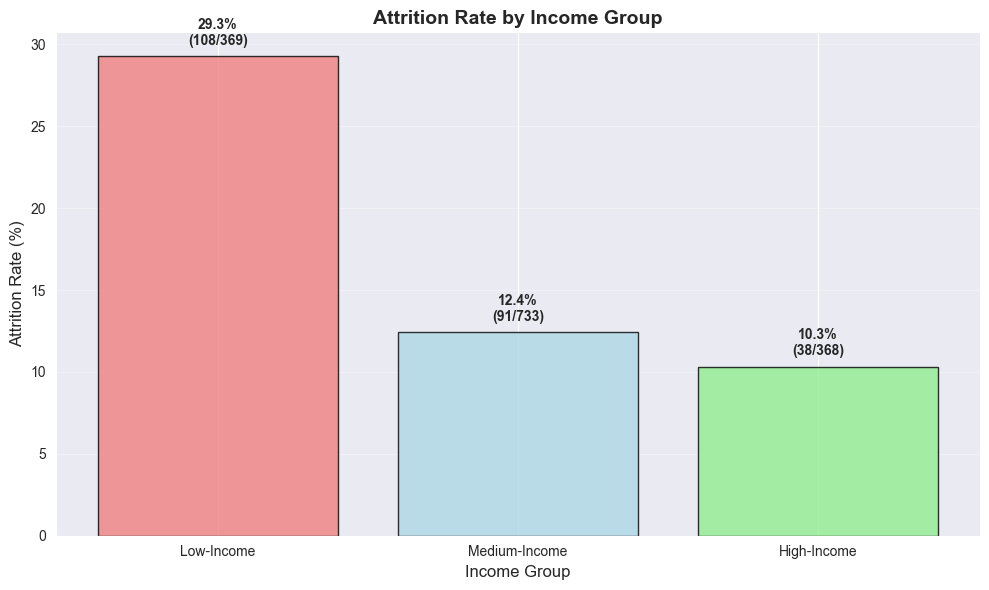

In [73]:
#define Salaries
min = df['MonthlyIncome'].min()
q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.5)
q3 = df['MonthlyIncome'].quantile(0.75)
max = df['MonthlyIncome'].max()

IQR = q3 - q1
print(min, q1, q2, q3, max, IQR)

bins_3groups = [1000, 2911, 8379, 20000]
labels_3groups = ['Low-Income', 'Medium-Income', 'High-Income']

df['Income_Group'] = pd.cut(df['MonthlyIncome'], bins=bins_3groups, labels=labels_3groups)

attrition_by_income = df.groupby('Income_Group')['Attrition'].agg(['sum', 'count'])
attrition_by_income['attrition_rate'] = (attrition_by_income['sum'] / attrition_by_income['count']) * 100
print(attrition_by_income)

# create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(attrition_by_income.index, attrition_by_income['attrition_rate'],
               color=['lightcoral', 'lightblue', 'lightgreen'],
               edgecolor='black', alpha=0.8)

# show %
for bar, rate, total_count, attrition_count in zip(bars,
                                                  attrition_by_income['attrition_rate'],
                                                  attrition_by_income['count'],
                                                  attrition_by_income['sum']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate:.1f}%\n({attrition_count}/{total_count})',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.title('Attrition Rate by Income Group', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

H1: Overtime → higher attrition

Question: Are employees who work overtime (Overtime = Yes) more likely to resign?

H₁: The attrition rate is higher for Overtime = Yes than for Overtime = No.

H₀: The attrition rate is independent of overtime (no difference).


Test:
Chi-Squared

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv("../cleaned_hr_data.csv")

# create Table
table = pd.crosstab(df["OverTime"], df["Attrition"])
print(table)

# Chi-Square Test
chi2_stat, p, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p)
print("estimated probs:")
print(expected)


Attrition    0    1
OverTime           
0          944  110
1          289  127
Chi-Square Statistic: 87.56429365828768
p-value: 8.15842372153832e-21
estimated probs:
[[884.06938776 169.93061224]
 [348.93061224  67.06938776]]


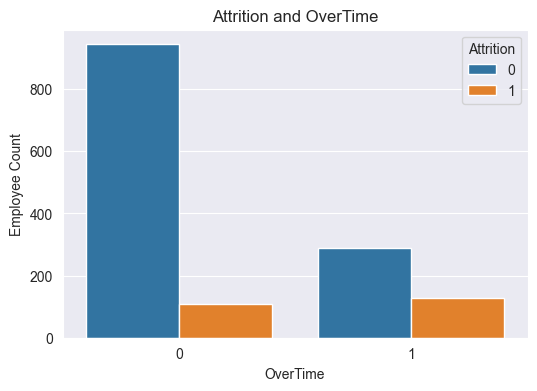

0.30528846153846156
0.10436432637571158


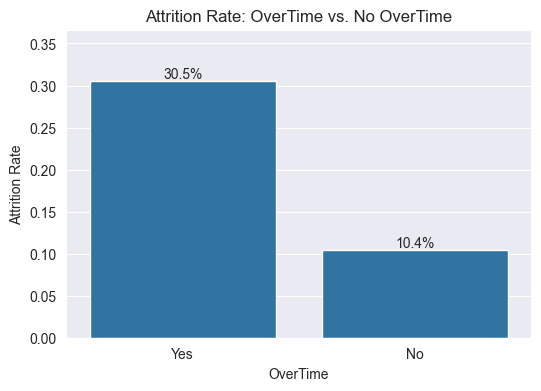

In [28]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition and OverTime")
plt.xlabel("OverTime")
plt.ylabel("Employee Count")
plt.show()


#show Attrition Rate
overtime_yes = df[df['OverTime'] == 1]
overtime_no = df[df['OverTime'] == 0]

rate_overtime_yes = len(overtime_yes[overtime_yes['Attrition'] == 1]) / len(overtime_yes)
rate_overtime_no = len(overtime_no[overtime_no['Attrition'] == 1]) / len(overtime_no)
print(rate_overtime_yes)
print(rate_overtime_no)



rates = {
    "OverTime": ["Yes", "No"],
    "AttritionRate": [rate_overtime_yes, rate_overtime_no]
}

import pandas as pd
df_rates = pd.DataFrame(rates)

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_rates, x="OverTime", y="AttritionRate")


for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom")

plt.title("Attrition Rate: OverTime vs. No OverTime")
plt.ylabel("Attrition Rate")
plt.ylim(0, max(df_rates["AttritionRate"])*1.2)
plt.show()

**Low Income vs. Overtime**

In [82]:
Income_group_Overtime = df.groupby('Income_Group')['OverTime'].agg(['sum', 'count'])
Income_group_Overtime['Overtime_rate'] = (Income_group_Overtime['sum'] / Income_group_Overtime['count']) * 100
print(Income_group_Overtime)



               sum  count  Overtime_rate
Income_Group                            
Low-Income     106    369      28.726287
Medium-Income  205    733      27.967258
High-Income    105    368      28.532609


H2: Low professional experience (YearsAtCompany < 2) → higher attrition
Define, for example, LowExp = YearsAtCompany < 2.

H₁: Employees with YearsAtCompany < 2 have a higher attrition rate than employees with ≥ 2 years.

H₀: The attrition rate does not differ between YearsAtCompany <2 and ≥2.


Test:
Chi-squared independence test: LowExp × Attrition

In [32]:
#Seelct Employees with YearsAtCompany < 2
print(df["YearsAtCompany"].unique())
df["underTwoYears"] = (df["YearsAtCompany"] < 2).astype(int)

table = pd.crosstab(df["underTwoYears"], df['Attrition'])
print(table)

chi2_stat, p, dof, expected = chi2_contingency(table)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p)
print("estimated probs:")
print(expected)

print(f'Attrition Rate > 2 Years: { 162 / (1093+162)}')
print(f'Attrition Rate < 2 Years: { 75 / (140+75)}')

[ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
Attrition         0    1
underTwoYears           
0              1093  162
1               140   75
Chi-Square Statistic: 63.93311463496687
p-value: 1.2871580362656326e-15
estimated probs:
[[1052.66326531  202.33673469]
 [ 180.33673469   34.66326531]]
Attrition Rate > 2 Years: 0.12908366533864543
Attrition Rate < 2 Years: 0.3488372093023256


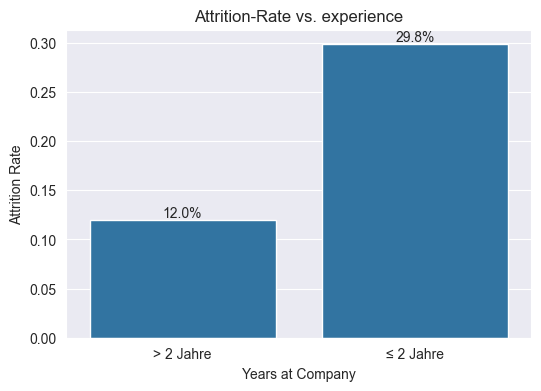

In [87]:
df['LowExperience'] = (df['YearsAtCompany'] <= 2).astype(int)
emp_over_two_years = df[df['YearsAtCompany'] > 2]

df['Attrition_bin'] = (df['Attrition'] == 1).astype(int)

rate = df.groupby('LowExperience')['Attrition_bin'].mean().reset_index()
rate['LowExperience'] = rate['LowExperience'].map({0: '> 2 Jahre', 1: '≤ 2 Jahre'})


plt.figure(figsize=(6,4))
ax = sns.barplot(data=rate, x='LowExperience', y='Attrition_bin')

# Display %
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.title("Attrition-Rate vs. experience")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.show()



**Years at Company vs. Overtime**

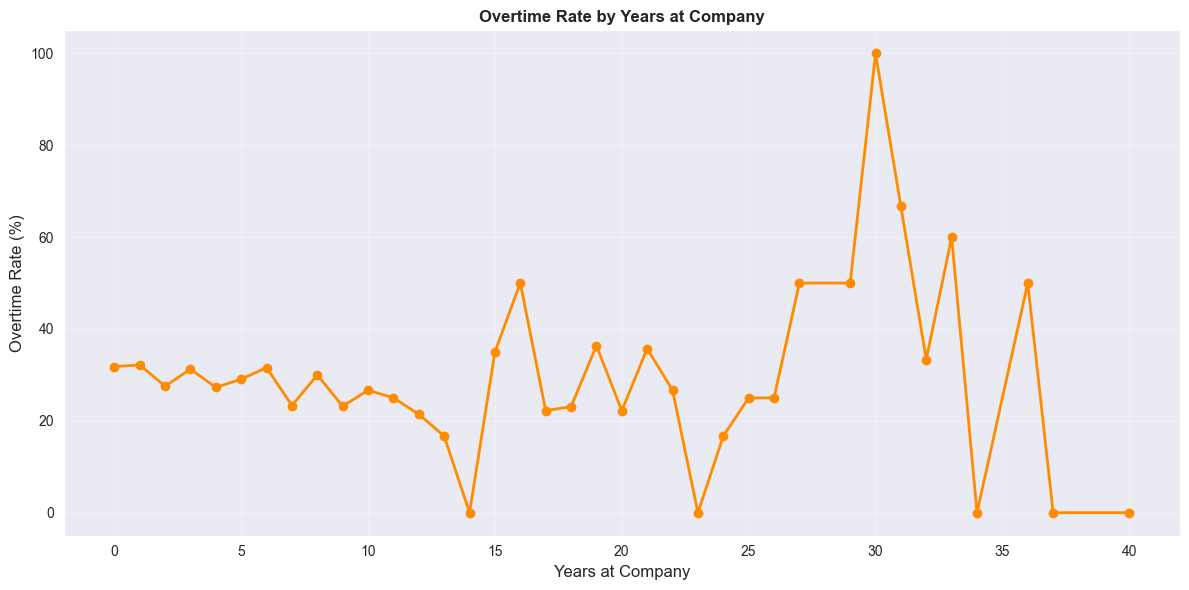

In [84]:
Years_at_company_Overtime = df.groupby('YearsAtCompany')['OverTime'].agg(['sum', 'count'])
Years_at_company_Overtime['Overtime_rate'] = (Years_at_company_Overtime['sum'] / Years_at_company_Overtime['count']) * 100

plt.figure(figsize=(12, 6))
plt.plot(Years_at_company_Overtime.index, Years_at_company_Overtime['Overtime_rate'],
         marker='o', linewidth=2, markersize=6, color='darkorange')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Overtime Rate (%)', fontsize=12)
plt.title('Overtime Rate by Years at Company', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

H3: “Jobs involving frequent travel (business travel = frequently) lead to higher attrition.”

H1: The attrition rate is NOT the same across the three business travel groups.

H0: Business travel and attrition are independent (no difference).

chi-squared





Attrition         0    1
underTwoYears           
0              1093  162
1               140   75
Chi²: 24.182413685655174
p-Wert: 5.608614476449931e-06
frequentely rate: 0.2490974729241877
rarely rate: 0.14956855225311602
no rate: 0.08


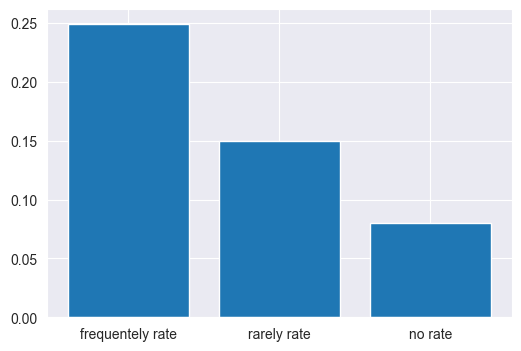

In [114]:
BT_table = pd.crosstab(df["BusinessTravel"], df['Attrition'])
print(table)

chi2, p, dof, expected = chi2_contingency(BT_table)
print("Chi²:", chi2)
print("p-Wert:", p)

print(f"frequentely rate: {69 / (208+69)}")
print(f"rarely rate: {156 / (887+156)}")
print(f"no rate: {12 / (138+12)}")

plt.figure(figsize=(6,4))
plt.bar(['frequentely rate', 'rarely rate', 'no rate'], [69 / (208+69), 156 / (887+156), 12 / (138+12)])
plt.show()

**ANALYZE DRIVERS**

int64


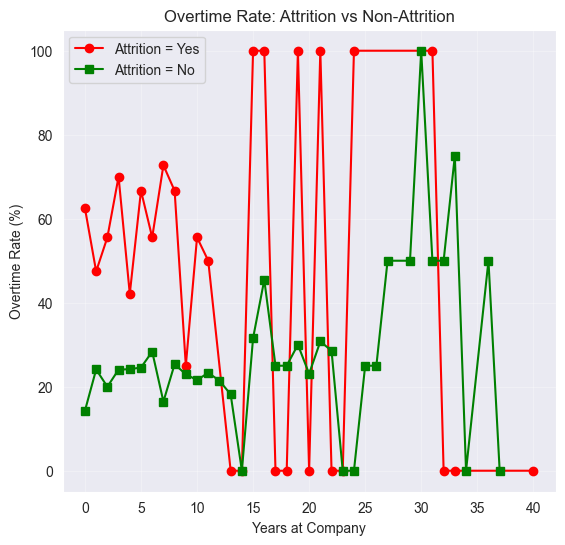

In [111]:
# Overtime-Rate nach YearsAtCompany für Attrition vs. Non-Attrition
plt.figure(figsize=(14, 6))
print(df['OverTime'].dtype)
# Attrition = Yes
attrition_yes = df[df['Attrition'] == 1].groupby('YearsAtCompany')['OverTime'].agg(['sum', 'count'])
attrition_yes['Rate'] = (attrition_yes['sum'] / attrition_yes['count']) * 100

# Attrition = No
attrition_no = df[df['Attrition'] == 0].groupby('YearsAtCompany')['OverTime'].agg(['sum', 'count'])
attrition_no['Rate'] = (attrition_no['sum'] / attrition_no['count']) * 100


plt.subplot(1, 2, 1)
plt.plot(attrition_yes.index, attrition_yes['Rate'], marker='o', label='Attrition = Yes', color='red')
plt.plot(attrition_no.index, attrition_no['Rate'], marker='s', label='Attrition = No', color='green')
plt.xlabel('Years at Company')
plt.ylabel('Overtime Rate (%)')
plt.title('Overtime Rate: Attrition vs Non-Attrition')
plt.legend()
plt.grid(True, alpha=0.3)

CORR HEATMAP:

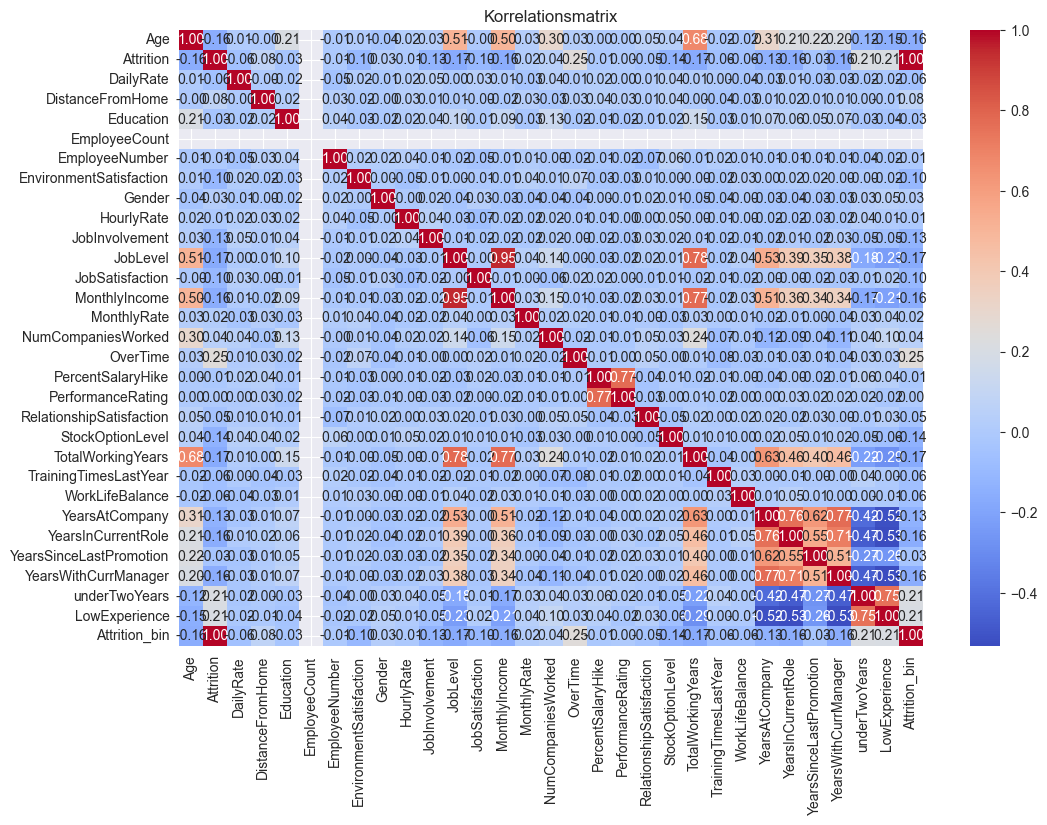

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten berücksichtigen
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()

Test Correlation with Targen Varibale for feature Selection

Korrelation mit Attrition:
                    Attrition
Attrition_bin        1.000000
Attrition            1.000000
OverTime             0.246118
underTwoYears        0.211165
LowExperience        0.205167
DistanceFromHome     0.077924
NumCompaniesWorked   0.043494
Gender               0.029453
MonthlyRate          0.015170
PerformanceRating    0.002889


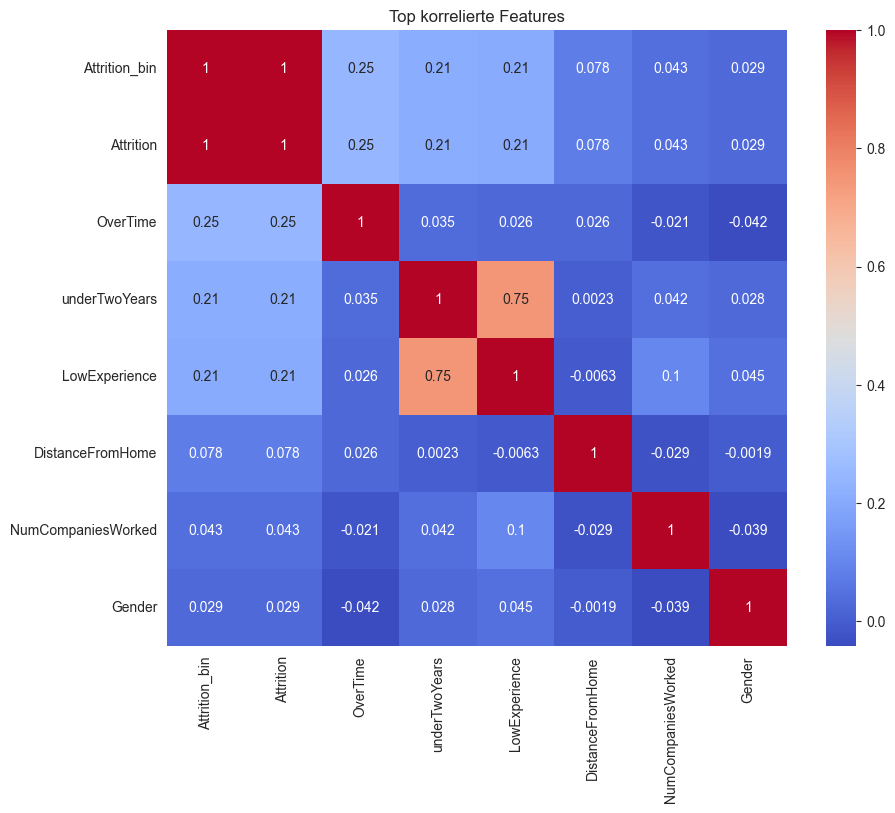

In [36]:
import seaborn as sns

target_corr = df.corr(numeric_only=True)[['Attrition']].sort_values('Attrition', ascending=False)
print("Korrelation mit Attrition:")
print(target_corr.head(10))


plt.figure(figsize=(10, 8))
high_corr_features = target_corr.head(8).index
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top korrelierte Features')
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label Encoding for Target variable
le = LabelEncoder()
y = le.fit_transform(df['Attrition'])

# Numeric features only
X_numeric = df.select_dtypes(include=['int64', 'float64']).drop('Attrition', axis=1, errors='ignore')

# Remove constant features (features with only one unique value)
constant_features = []
for col in X_numeric.columns:
    if X_numeric[col].nunique() <= 1:  # Only one unique value
        constant_features.append(col)
        print(f"Removed constant feature: {col}")

X_numeric = X_numeric.drop(columns=constant_features)


print(f"Remaining features after cleaning: {X_numeric.shape[1]}")

# Univariate Selection
try:
    selector = SelectKBest(score_func=f_classif, k=min(15, X_numeric.shape[1]))
    X_selected = selector.fit_transform(X_numeric, y)

    # Display important features
    feature_scores = pd.DataFrame({
        'feature': X_numeric.columns,
        'score': selector.scores_,
        'p_value': selector.pvalues_
    })
    feature_scores = feature_scores.sort_values('score', ascending=False)

    print("top 15 features ")
    print(feature_scores.head(15))

except Exception as e:
    print(f"Error in Univariate Selection: {e}")

# Low-Variance Features
try:
    # Adjust threshold if needed
    selector_var = VarianceThreshold(threshold=0.01)
    X_high_variance = selector_var.fit_transform(X_numeric)

    # Features with high variance
    selected_features = X_numeric.columns[selector_var.get_support()]
    print(f"high Variance: {len(selected_features)} ===")
    print(selected_features.tolist())

    # Features with low variance
    low_variance_features = X_numeric.columns[~selector_var.get_support()]
    print(f"Low Variance: {len(low_variance_features)} ===")
    print(low_variance_features.tolist())

except Exception as e:
    print(f"Error in Variance Threshold: {e}")

Removed constant feature: EmployeeCount
Remaining features after cleaning: 26
top 15 features 
                    feature      score       p_value
14                 OverTime  94.656457  1.009254e-21
19        TotalWorkingYears  44.252491  4.061878e-11
9                  JobLevel  43.215344  6.795385e-11
23       YearsInCurrentRole  38.838303  6.003186e-10
11            MonthlyIncome  38.488819  7.147364e-10
0                       Age  38.175887  8.356308e-10
25     YearsWithCurrManager  36.712311  1.736987e-09
18         StockOptionLevel  28.140501  1.301015e-07
22           YearsAtCompany  27.001624  2.318872e-07
8            JobInvolvement  25.241985  5.677065e-07
10          JobSatisfaction  15.890004  7.043067e-05
5   EnvironmentSatisfaction  15.855209  7.172339e-05
2          DistanceFromHome   8.968277  2.793060e-03
21          WorkLifeBalance   6.026116  1.421105e-02
20    TrainingTimesLastYear   5.211646  2.257850e-02
high Variance: 26 ===
['Age', 'DailyRate', 'DistanceFromH